In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bank-full (1).csv to bank-full (1).csv


In [3]:
Bank=pd.read_csv("bank-full (1).csv")
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
Bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
Bank=pd.get_dummies(Bank,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
Bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [7]:
Bank=Bank.rename(columns={'job_admin.':'job_admin'} )

In [8]:
Bank.count()

age                    45211
balance                45211
day                    45211
duration               45211
campaign               45211
pdays                  45211
previous               45211
job_admin              45211
job_blue-collar        45211
job_entrepreneur       45211
job_housemaid          45211
job_management         45211
job_retired            45211
job_self-employed      45211
job_services           45211
job_student            45211
job_technician         45211
job_unemployed         45211
job_unknown            45211
marital_divorced       45211
marital_married        45211
marital_single         45211
education_primary      45211
education_secondary    45211
education_tertiary     45211
education_unknown      45211
default_no             45211
default_yes            45211
housing_no             45211
housing_yes            45211
loan_no                45211
loan_yes               45211
contact_cellular       45211
contact_telephone      45211
contact_unknow

In [9]:
X=Bank.iloc[:,:-1]
Y=Bank.iloc[:,-1]

In [10]:
Bank_classifier = LogisticRegression()
Bank_classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
Bank_classifier.coef_

array([[ 4.34782155e-02,  1.06574395e-05,  4.69159606e-02,
         4.34593362e-03, -5.90005256e-01,  8.81724075e-03,
        -8.29042457e-01, -2.75867995e-02, -4.57193485e-01,
        -5.25074161e-02, -2.16314237e-02,  3.37791387e-02,
         2.81046445e-01, -3.12349124e-02, -1.55874506e-01,
         7.50341966e-02, -1.11348377e-01,  6.62873963e-03,
         3.01958345e-03,  2.37563720e-02, -3.33426851e-01,
        -1.48198337e-01, -1.49847490e-01, -4.55809478e-01,
         1.23223878e-01,  2.45642735e-02, -4.19486548e-01,
        -3.83822678e-02,  6.98335998e-01, -1.15620481e+00,
        -8.00643728e-02, -3.77804443e-01,  2.53910297e-01,
         8.55740479e-02, -7.97353161e-01,  9.57439018e-02,
         5.38655867e-02,  5.82681915e-02, -1.30498147e-02,
        -4.91625309e-02, -1.51918405e-01, -9.25164292e-02,
         1.78737562e-01, -7.42092013e-01, -1.30119726e-01,
         1.88150281e-01,  1.46224580e-01, -2.80287784e-01,
        -8.04136550e-02,  5.99143774e-01, -6.96311151e-0

In [12]:
Beta_Coefficients=pd.Series(Bank_classifier.coef_[0])
Beta_Coefficients

0     0.043478
1     0.000011
2     0.046916
3     0.004346
4    -0.590005
5     0.008817
6    -0.829042
7    -0.027587
8    -0.457193
9    -0.052507
10   -0.021631
11    0.033779
12    0.281046
13   -0.031235
14   -0.155875
15    0.075034
16   -0.111348
17    0.006629
18    0.003020
19    0.023756
20   -0.333427
21   -0.148198
22   -0.149847
23   -0.455809
24    0.123224
25    0.024564
26   -0.419487
27   -0.038382
28    0.698336
29   -1.156205
30   -0.080064
31   -0.377804
32    0.253910
33    0.085574
34   -0.797353
35    0.095744
36    0.053866
37    0.058268
38   -0.013050
39   -0.049163
40   -0.151918
41   -0.092516
42    0.178738
43   -0.742092
44   -0.130120
45    0.188150
46    0.146225
47   -0.280288
48   -0.080414
49    0.599144
50   -0.696311
51   -4.317370
dtype: float64

In [13]:
Y_pred= Bank_classifier.predict(X)
Y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [14]:
Y_pred_df=pd.DataFrame({'Actual':Y,'Predictions':Bank_classifier.predict(X)})

In [15]:
Y_pred_df

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,Y_pred)
print(cm)

[[39531   391]
 [ 1296  3993]]


In [17]:
#Accuracy Checking
((39531+3993)/(39531+391+1296+3993))*100

96.26860719736348

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39922
           1       0.91      0.75      0.83      5289

    accuracy                           0.96     45211
   macro avg       0.94      0.87      0.90     45211
weighted avg       0.96      0.96      0.96     45211



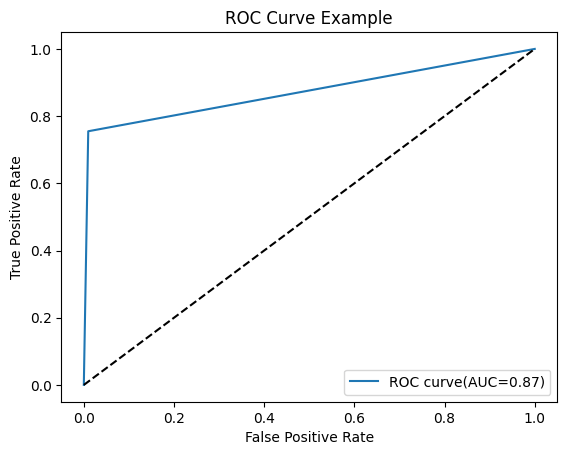

In [19]:
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(Y,Y_pred)
auc=roc_auc_score(Y,Y_pred)
plt.plot(fpr, tpr,label='ROC curve(AUC=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Example')
plt.legend(loc='lower right')
plt.show()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


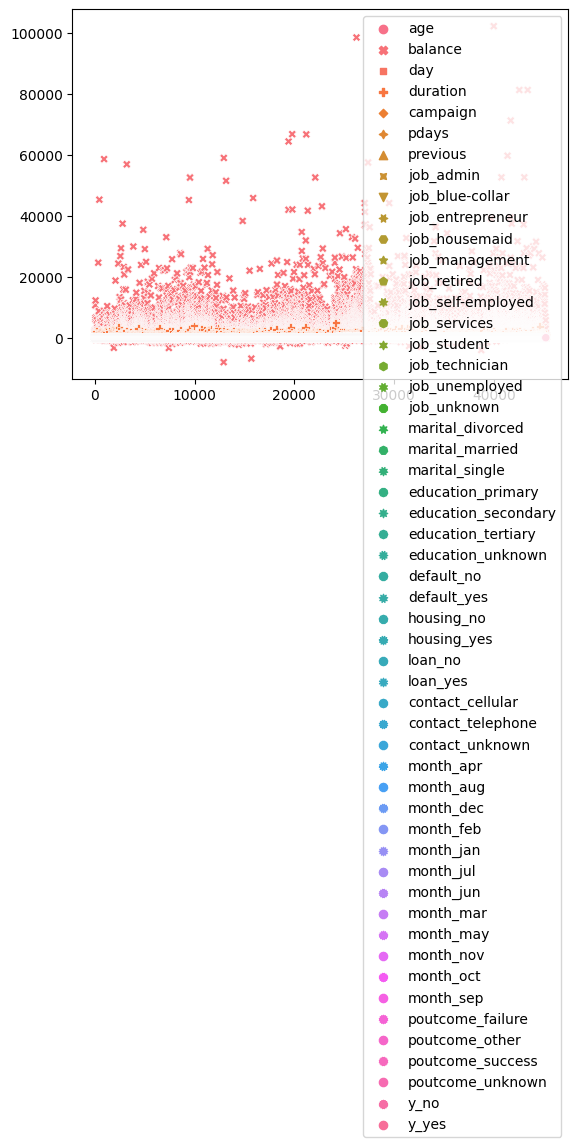

In [20]:
import seaborn as sns
sns.scatterplot(Bank)

<Axes: >

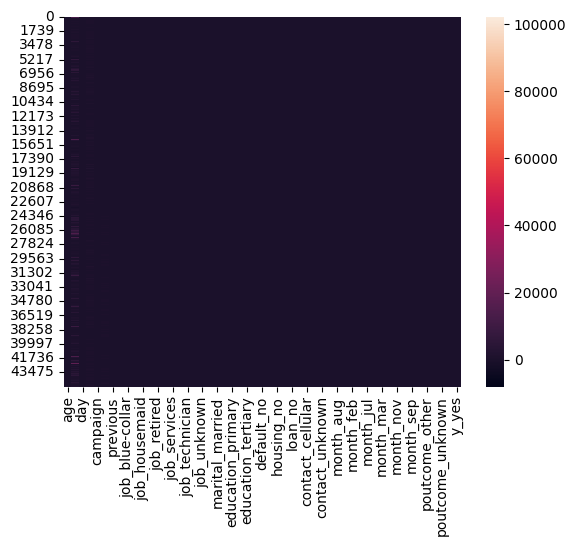

In [21]:
sns.heatmap(data=Bank)

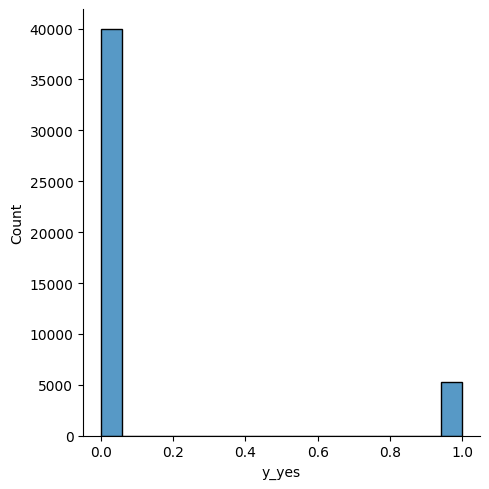

In [22]:
sns.displot(Bank['y_yes'])

<Axes: xlabel='balance', ylabel='age'>

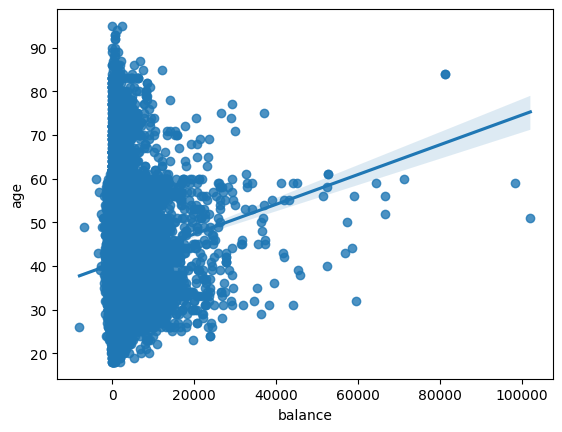

In [23]:
sns.regplot(Bank,x='balance',y='age')